In [ ]:
!pip install diffusers["torch"] transformers
!pip install -U gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73

 DONE

In [ ]:
!pip install accelerate


In [ ]:
!pip install git+https://github.com/huggingface/diffusers

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-3h0j5fp9
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-3h0j5fp9
  Resolved https://github.com/huggingface/diffusers to commit d9029f2c5981a96ab51f8996be620af116b8d743
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2844748 sha256=16f8d1170527058f8b9a5fe6f93e21ad6da7962b5eaa2c2e89033f207cf391e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-77guazay/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3


In [ ]:
%%writefile my_app.py

import torch
from diffusers import AutoPipelineForText2Image




#pipe = StableDiffusionPipeline.from_pretrained("emilianJR/chilloutmix_NiPrunedFp32Fix",torch_dtype=torch.float16)
#pipe = StableDiffusionPipeline.from_pretrained("emilianJR/epiCRealism", torch_dtype=torch.float16)
pipe = AutoPipelineForText2Image.from_pretrained("lykon/dreamshaper-8", torch_dtype=torch.float32, use_safetensors=True,)
pipe.enable_lora()
pipe.load_lora_weights("LyliaEngine/add-detail-xl")

pipe = pipe.to("cuda")
pipe.safety_checker = None

import gradio as gr
interface = gr.Interface.from_pipeline(pipe)
interface.launch(inline=False)


Writing my_app.py


In [ ]:
# - Option 2: Running with Ngrok - #

Ngrok_token = '2N2t7vPikYRT1i1u6wtOXlnKZrS_515UfN4zLhy9qRwDb4AiN' #@param {type:"string"}
# Put your ngrok token here (obtainable from https://ngrok.com)

Ngrok_domain = "" # optional, leave empty if you don't have a domain

# -------------------------------- #

!pip install pyngrok

from pyngrok import ngrok, conf
import fileinput
import sys

if Ngrok_token!="":
  ngrok.kill()
  srv=ngrok.connect(7860 , pyngrok_config=conf.PyngrokConfig(auth_token=Ngrok_token),
                    bind_tls=True, domain=Ngrok_domain).public_url
  print(srv)
  get_ipython().system("python my_app.py")
else:
  print('An ngrok token is required. You can get one on https://ngrok.com and paste it into the ngrok_token')

https://bb93-34-142-239-35.ngrok-free.app
2024-10-17 08:10:37.074224: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-17 08:10:37.093894: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-17 08:10:37.099822: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-17 08:10:37.115005: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-17 

In [ ]:
!pip install -U peft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 13.2 MB/s eta 0:00:00


UP to here

  0%|          | 0/50 [00:00<?, ?it/s]

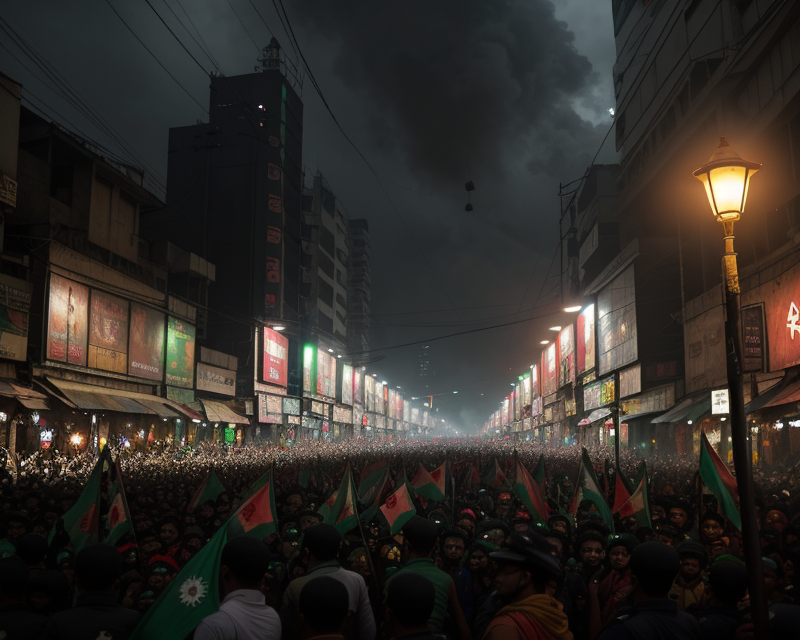

In [ ]:
prompt = "Bangladesh,crowd of protesters,clash, bangladesh flag wave,police violence,street light, low light, cyberpunk,futuristic, CGSociety, highly detailed, vibrant Bangladesh,street light, low light,cinematic,  mid-shot, highly detailed,  Unreal Engine, cinematic wallpaper,dark clouds,gloomy,picaso"
h=640
w=800
steps=50
guidance=8.5
neg = "cars, easynegative, lowres, bad anatomy, bad hands, text, error, missing limbs, bad anatomy,watermark"

image = pipe(
    prompt,
    num_inference_steps=steps,
    height=h,
    width=w,
    guidance_scale=guidance,
    negative_prompt=neg,

).images[0]
image

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

model_ckpt = "CompVis/stable-diffusion-v1-4"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_ckpt, torch_dtype=torch.float16).to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
prompt = "Bangladesh,crowd of protesters,,clash, bangladesh flag wave,police violence,street light, low light, cyberpunk,futuristic, CGSociety, highly detailed, vibrant Bangladesh,street light, low light,cinematic,  mid-shot, highly detailed,  Unreal Engine, cinematic wallpaper,dark clouds,gloomy,picaso"
h=640
w=800
steps=50
guidance=8.5
neg = "cars, easynegative, lowres, bad anatomy, bad hands, text, error, missing limbs, bad anatomy,watermark"
generator = torch.manual_seed(seed)
image = pipe(prompt,  num_inference_steps=steps,height=h, width=w, guidance_scale=guidance, negative_prompt=neg,generator =generator, output_type="np").images

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
from torchmetrics.functional.multimodal import clip_score
from functools import partial

clip_score_fn = partial(clip_score, model_name_or_path="openai/clip-vit-base-patch16")

def calculate_clip_score(images, prompts):
    images_int = (images * 255).astype("uint8")
    clip_score = clip_score_fn(torch.from_numpy(images_int).permute(0, 3, 1, 2), prompts).detach()
    return round(float(clip_score), 4)

sd_clip_score = calculate_clip_score(image, prompt)
print(f"CLIP score: {sd_clip_score}")

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIP score: 42.9531
